In [87]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

X16 = pd.read_csv('X16.csv', sep=',', header='infer') 

# LinReg Logerror vs chaque variables 

In [88]:
features = X16.columns[4:]
features

Index(['airconditioningtypeid', 'bathroomcnt', 'bedroomcnt',
       'buildingqualitytypeid', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'unitcnt', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'censustractandblock'],
      dtype='object')

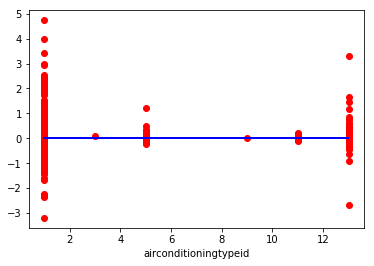

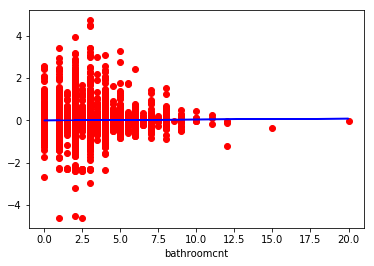

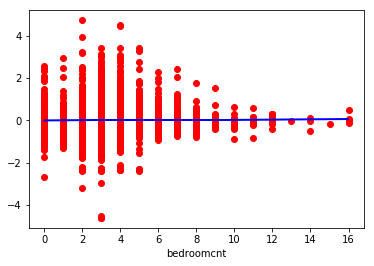

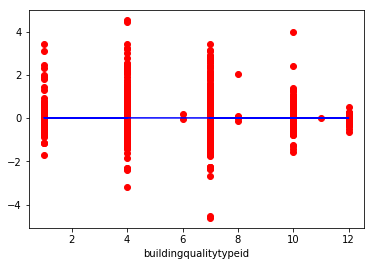

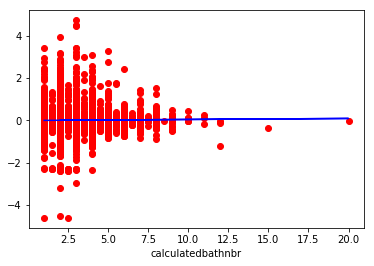

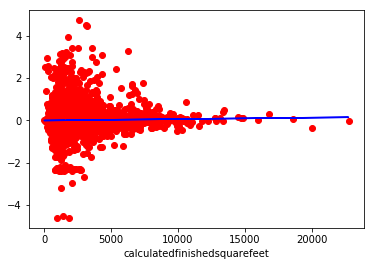

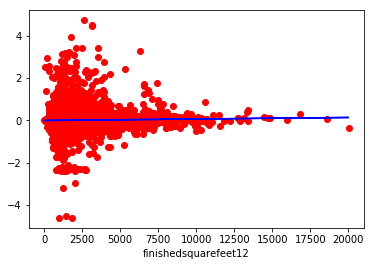

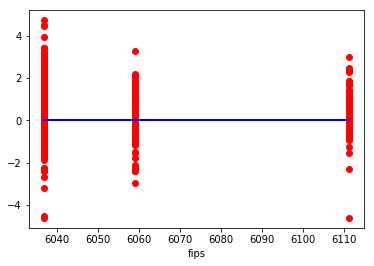

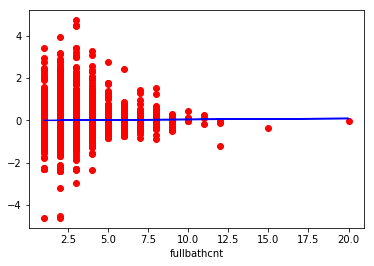

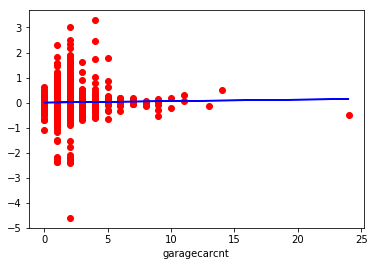

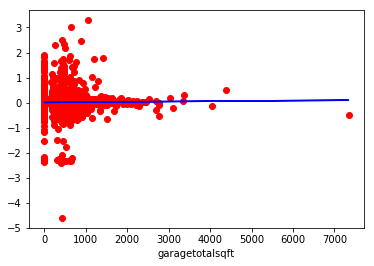

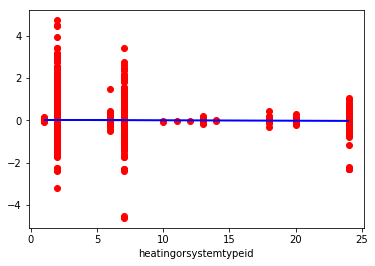

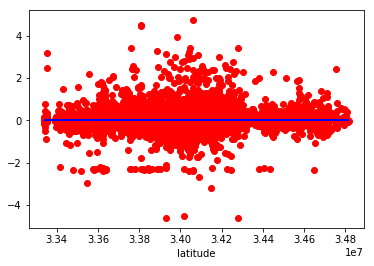

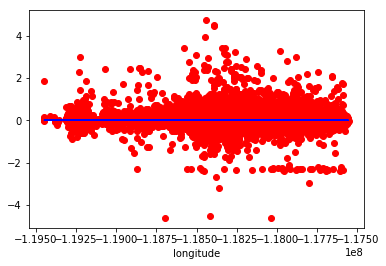

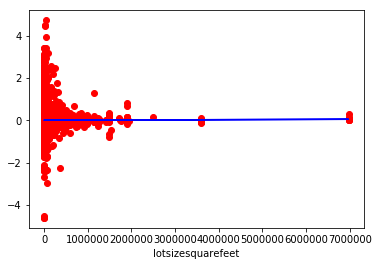

ValueError: could not convert string to float: '010C'

In [46]:
i=0
for col in features:    
    data = {
        'err': X16['logerror'].values,
        'surface': X16[col].values
    }
    X = pd.DataFrame(
        data=data,
        index=X16['parcelid'].values, 
    )

    X.dropna(inplace=True)
    y = X.err.values
    x = X.surface.values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    
    fig = plt.figure(1)
    plt.plot(x, y, 'r.', markersize=12)
    plt.plot(x, lr.predict(x), 'b-')
    plt.xlabel(col)
    i+=1
    plt.show()

In [145]:
data = {
    'err': X16['logerror'].values,
    'surface': X16['calculatedfinishedsquarefeet'].values,
    'latitude': X16['latitude'].values,
    'longitude': X16['longitude'].values,
    'bedroomcnt': X16['bedroomcnt'].values,
}
X = pd.DataFrame(
    data=data,
    index=X16['parcelid'].values, 
)
X.dropna(inplace=True)
y = X.err.values
x = X[['surface', 'latitude', 'longitude', 'bedroomcnt']].values
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.001648
test set score: 0.001235


In [147]:
lr.RMSE(X_train, y_train)

AttributeError: 'LinearRegression' object has no attribute 'RMSE'

In [143]:
X[['surface', 'latitude', 'longitude']].values

array([[ 1.68400000e+03,  3.42809900e+07, -1.18488536e+08],
       [ 2.26300000e+03,  3.36681200e+07, -1.17677556e+08],
       [ 2.21700000e+03,  3.41363120e+07, -1.18175032e+08],
       ...,
       [ 2.61700000e+03,  3.40756550e+07, -1.18025537e+08],
       [ 1.03400000e+03,  3.39639000e+07, -1.18367000e+08],
       [ 1.52400000e+03,  3.38389330e+07, -1.18219093e+08]])

In [127]:
lr.predict(X_test)

array([ 0.0469, -0.044 ,  0.0889, ...,  0.0488, -0.005 , -0.0619])

In [79]:
lr.score(x,y)

1.0

In [108]:
lr.coef_

array([ 1.00000000e+00, -2.88088702e-21,  4.76737002e-23,  2.00057607e-23])

In [109]:
lr.intercept_

1.4536982728685643e-15